## Problem Statement
To predict how likely it is that the people will take an H1N1 flu vaccine using LogisticRegression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# get current working directory
print(os.getcwd())

/Users/kaushiki/4. Machine Learning/Classification


In [3]:
# os.chdir('/Users/kaushiki/Downloads/h1n1_vaccine_prediction.csv')
# print(os.getwd())

In [4]:
df1 = pd.read_csv('h1n1_vaccine_prediction.csv')
df1.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [5]:
df = df1.copy()

In [6]:
df.shape

(26707, 34)

### Preprocessing

#### Handling Null Values

In [7]:
nv = df.isnull().sum()
nv = nv[nv>0]
print(nv)

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
qualification                 1407
income_level                  4423
marital_status                1408
housing_status                2042
employment                    1463
no_of_adults                   249
no_of_children                 249
dtype: int64


In [8]:
nv_per = (nv/df.shape[0])*100
# print(nv_per)

In [9]:
nv_df = pd.DataFrame({'Col': nv.index, 'Sum-Null': nv.values, 'Per_Null':nv_per.values})
nv_df.sort_values(by='Sum-Null', ascending = False)

,Col,Sum-Null,Per_Null
14,has_health_insur,12274,45.957989
22,income_level,4423,16.561201
10,dr_recc_seasonal_vacc,2160,8.087767
9,dr_recc_h1n1_vacc,2160,8.087767
24,housing_status,2042,7.645936
25,employment,1463,5.477965
23,marital_status,1408,5.272026
21,qualification,1407,5.268282
11,chronic_medic_condition,971,3.635751
12,cont_child_undr_6_mnths,820,3.070356


In [11]:
df.drop(['unique_id','has_health_insur','income_level', 'dr_recc_seasonal_vacc', 'dr_recc_h1n1_vacc', 'housing_status'], inplace=True, axis =1)

In [12]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'marital_status', 'employment', 'census_msa',
       'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [13]:
res = nv_df['Col'][nv_df['Per_Null']>7]
res

9         dr_recc_h1n1_vacc
10    dr_recc_seasonal_vacc
14         has_health_insur
22             income_level
24           housing_status
Name: Col, dtype: object

In [14]:
nv1 = df.isnull().sum()
nv1[nv1>0]

h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
qualification                1407
marital_status               1408
employment                   1463
no_of_adults                  249
no_of_children                249
dtype: int64

In [15]:
dfa = df.copy()

In [16]:
dfa.dropna(inplace=True) # axis = 0, how = 'any'
dfa.shape

(24002, 28)

In [17]:
df.dropna(inplace=True) # axis = 0, how = 'any'
df.shape

(24002, 28)

In [18]:
# percentage of data loss
((26707 - dfa.shape[0])/26707)*100

10.128430748492905

#### Handling Duplicate Values

In [19]:
df.duplicated().sum()

22

In [20]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [21]:
df.shape

(23980, 28)

### EDA

In [22]:
df['h1n1_vaccine'].value_counts()
# data is imbalanced

0    18828
1     5152
Name: h1n1_vaccine, dtype: int64

In [23]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
marital_status                object
employment                    object
census_msa                    object
no_of_adults                 float64
no_of_children               float64
h

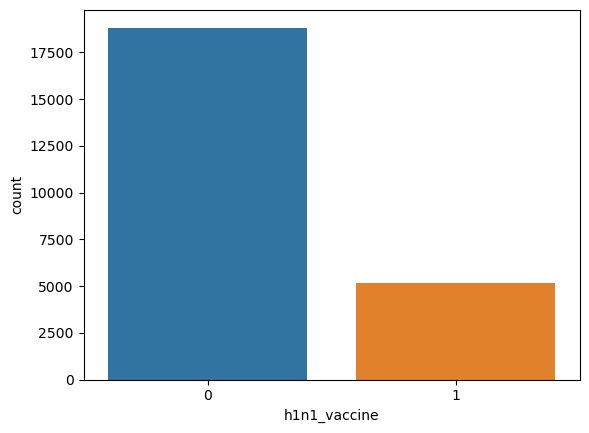

In [24]:
sns.countplot(x=df['h1n1_vaccine'])
plt.show()

In [25]:
# num_cols = df.dtypes[df.dtypes!='object'].index
num_cols = df.select_dtypes(exclude='object').columns
print(len(num_cols))
print(num_cols)

21
Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')


In [26]:
for i in num_cols:
    print(f'Feature name:{i}')
    print(df[i].value_counts())
    print('*'*20)

Feature name:h1n1_worry
2.0    9667
1.0    7415
3.0    4045
0.0    2853
Name: h1n1_worry, dtype: int64
********************
Feature name:h1n1_awareness
1.0    13246
2.0     8750
0.0     1984
Name: h1n1_awareness, dtype: int64
********************
Feature name:antiviral_medication
0.0    22837
1.0     1143
Name: antiviral_medication, dtype: int64
********************
Feature name:contact_avoidance
1.0    17598
0.0     6382
Name: contact_avoidance, dtype: int64
********************
Feature name:bought_face_mask
0.0    22355
1.0     1625
Name: bought_face_mask, dtype: int64
********************
Feature name:wash_hands_frequently
1.0    19909
0.0     4071
Name: wash_hands_frequently, dtype: int64
********************
Feature name:avoid_large_gatherings
0.0    15398
1.0     8582
Name: avoid_large_gatherings, dtype: int64
********************
Feature name:reduced_outside_home_cont
0.0    15934
1.0     8046
Name: reduced_outside_home_cont, dtype: int64
********************
Feature name:avoid_

#### inference: 
All features which are not object are categorical with float or int dtypes

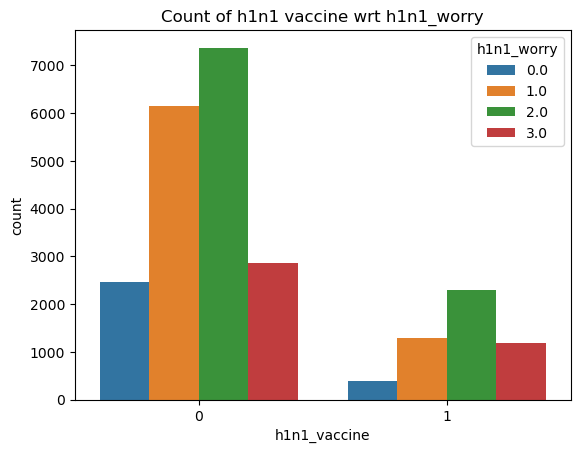

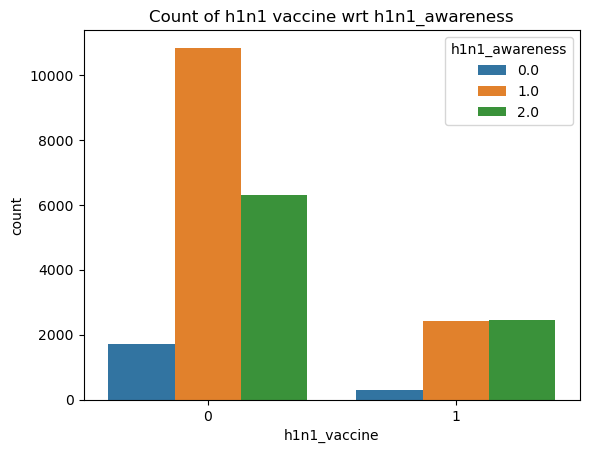

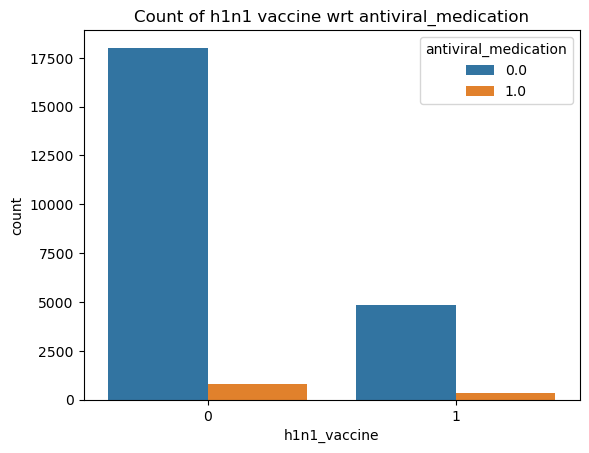

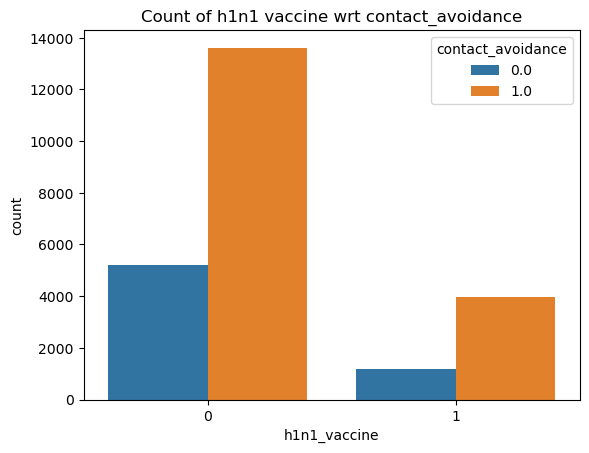

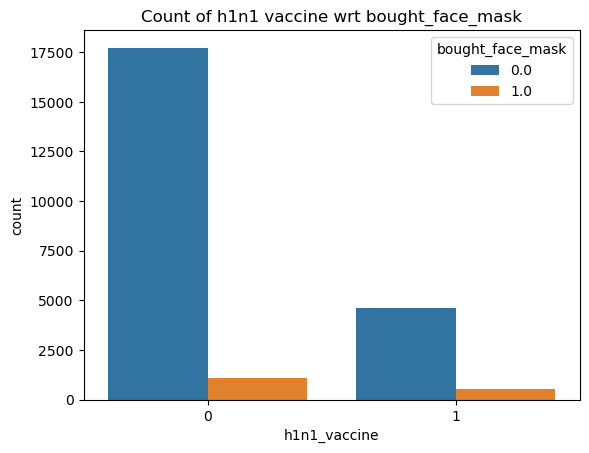

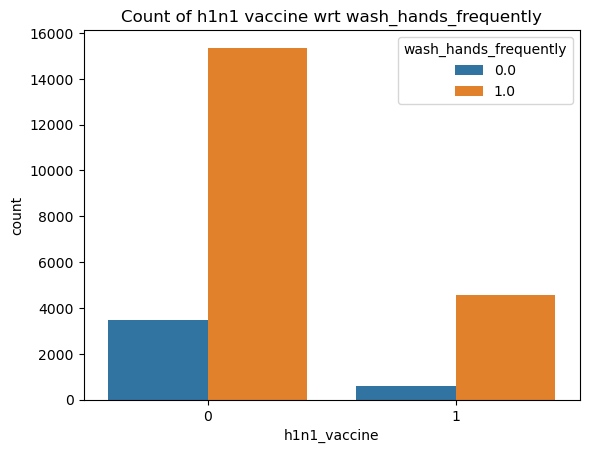

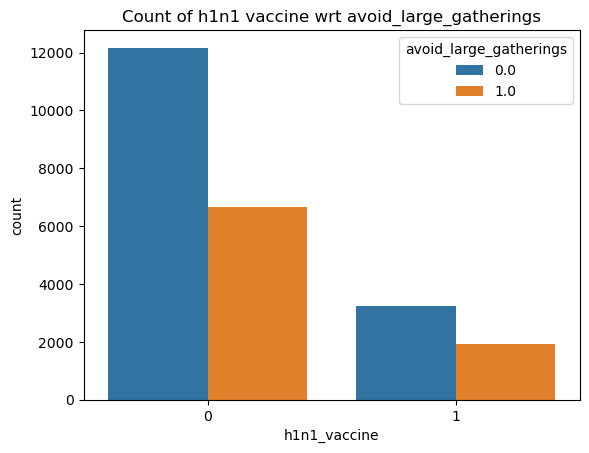

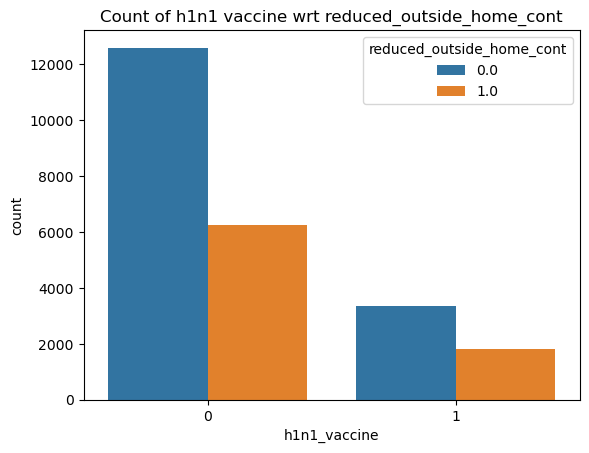

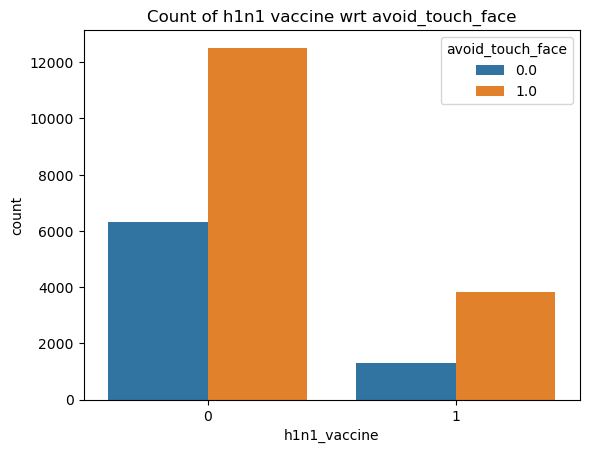

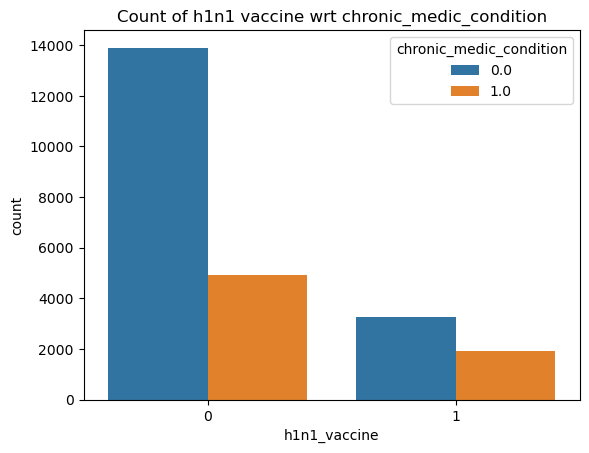

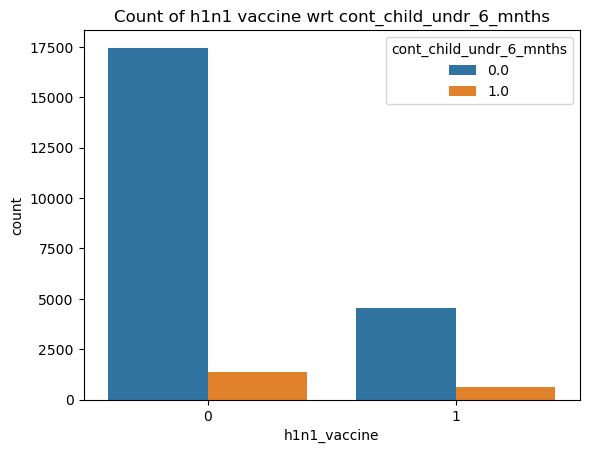

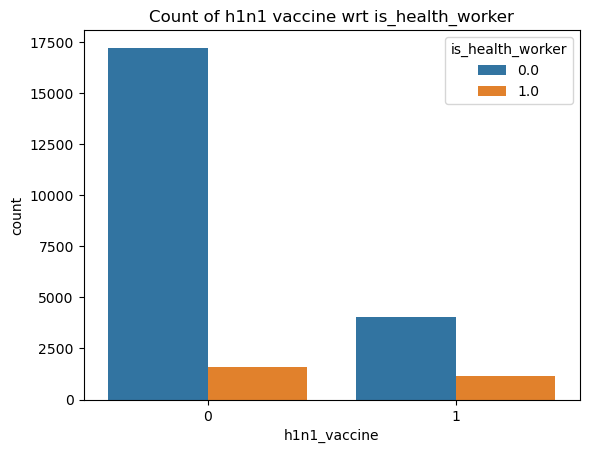

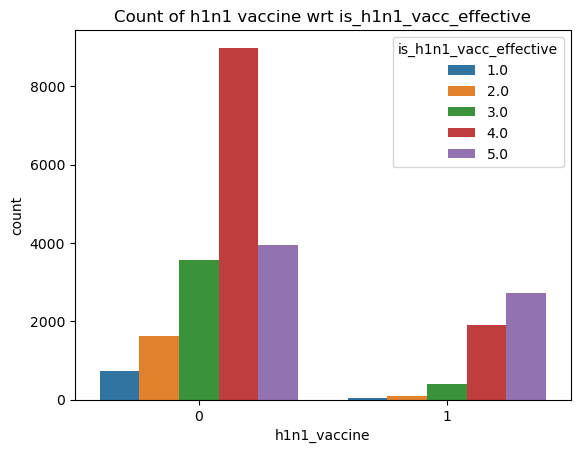

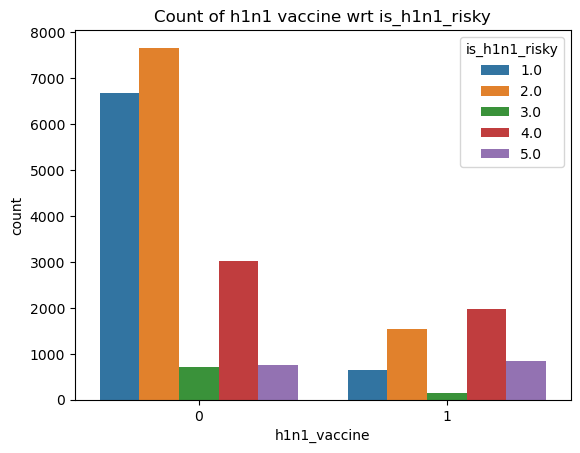

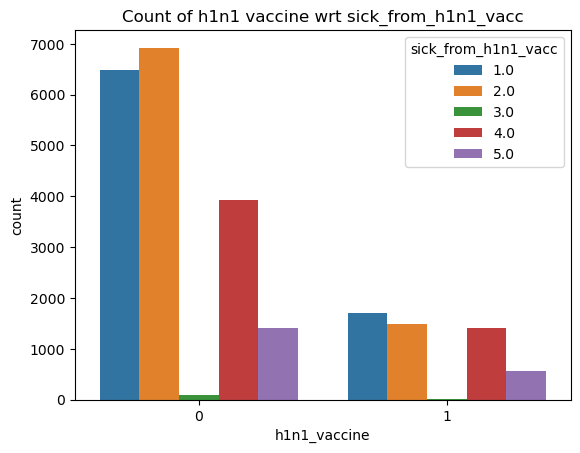

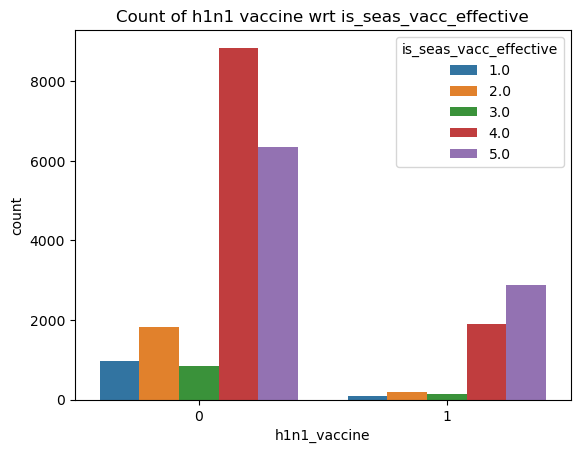

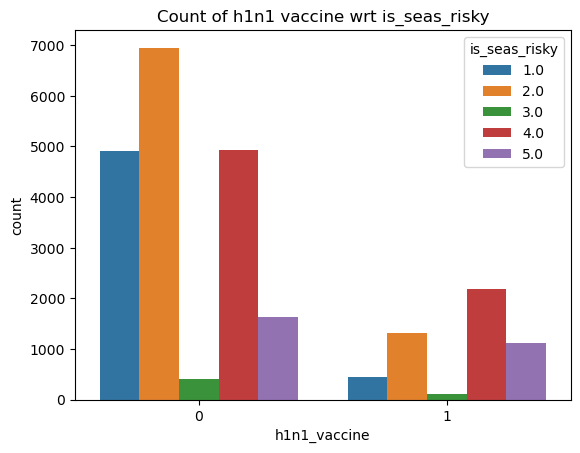

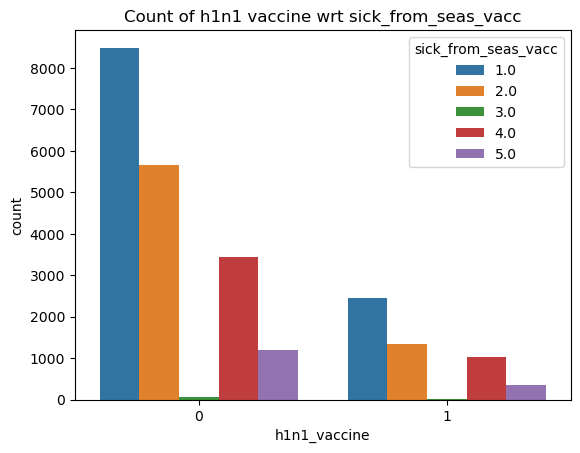

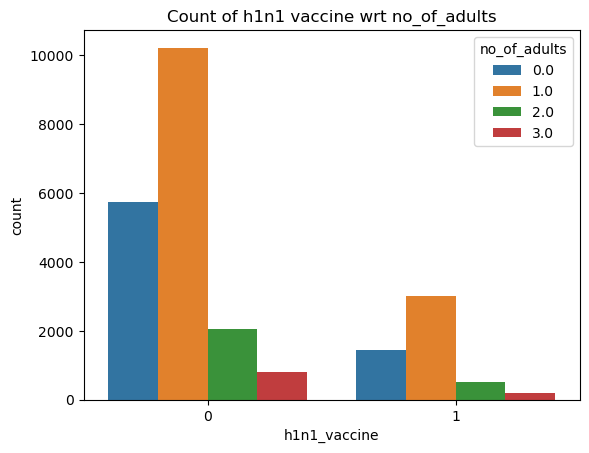

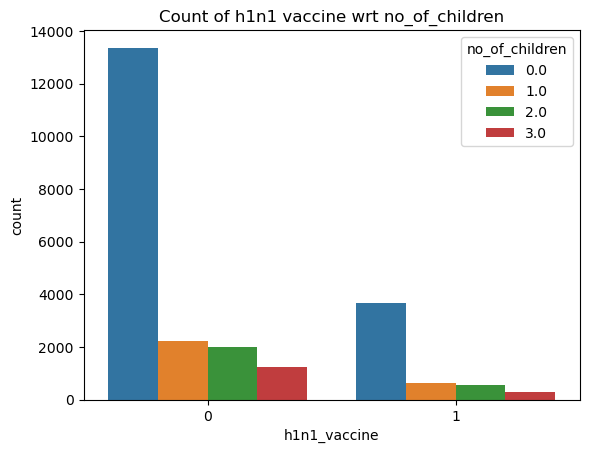

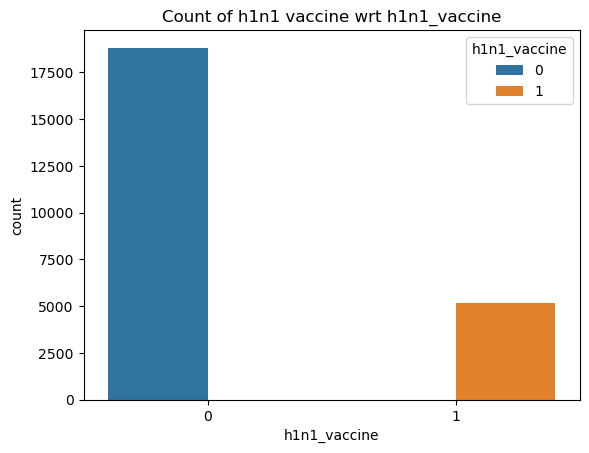

In [28]:
for i in num_cols:
    sns.countplot(x=df['h1n1_vaccine'], hue=df1[i])
    plt.title(f'Count of h1n1 vaccine wrt {i}')
    plt.show()

#### inferences:
1) 65+ and 55-64 yrs aged IDs have recived most h1n1 vaccination. <br>
2) College Grads and some collge have recived most h1n1 vaccination <br>
3) Most Ids with White race have recived vaccination <br>
4) More feamles are vaccinated compared to males <br>
5) More married IDs are vaccinated  <br>
6) More Ids for Employed and not in labor Force are vaccinated compated to Unemployed <br>
...

In [30]:
# cat_cols = df.dtypes[df.dtypes=='object'].index
cat_cols = df.select_dtypes(include='object').columns
print(len(cat_cols))
print(cat_cols)

7
Index(['age_bracket', 'qualification', 'race', 'sex', 'marital_status',
       'employment', 'census_msa'],
      dtype='object')


In [31]:
for i in cat_cols:
    print(f'Feature name:{i}')
    print(df[i].value_counts())
    print('*'*20)

Feature name:age_bracket
65+ Years        6044
55 - 64 Years    5111
45 - 54 Years    4753
18 - 34 Years    4662
35 - 44 Years    3410
Name: age_bracket, dtype: int64
********************
Feature name:qualification
College Graduate    9626
Some College        6708
12 Years            5461
< 12 Years          2185
Name: qualification, dtype: int64
********************
Feature name:race
White                19153
Black                 1876
Hispanic              1557
Other or Multiple     1394
Name: race, dtype: int64
********************
Feature name:sex
Female    14351
Male       9629
Name: sex, dtype: int64
********************
Feature name:marital_status
Married        12927
Not Married    11053
Name: marital_status, dtype: int64
********************
Feature name:employment
Employed              12998
Not in Labor Force     9587
Unemployed             1395
Name: employment, dtype: int64
********************
Feature name:census_msa
MSA, Not Principle  City    10468
MSA, Principle City 

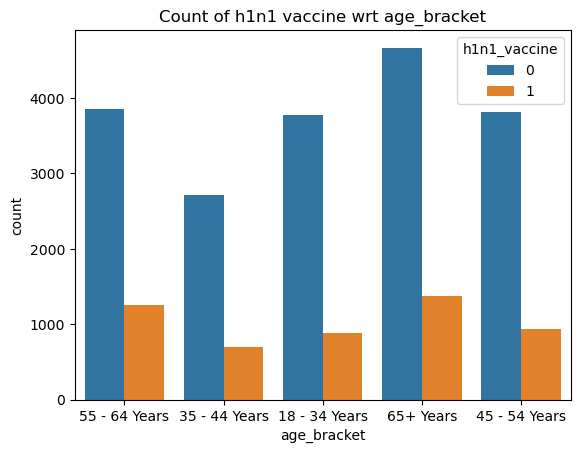

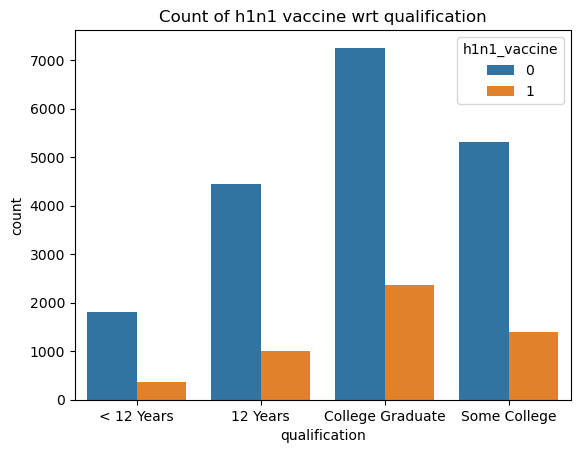

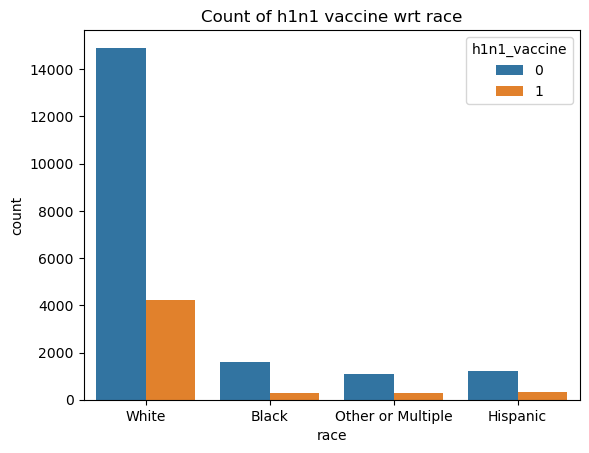

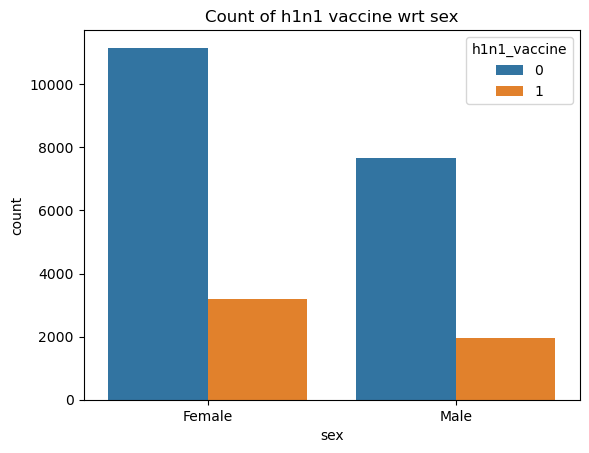

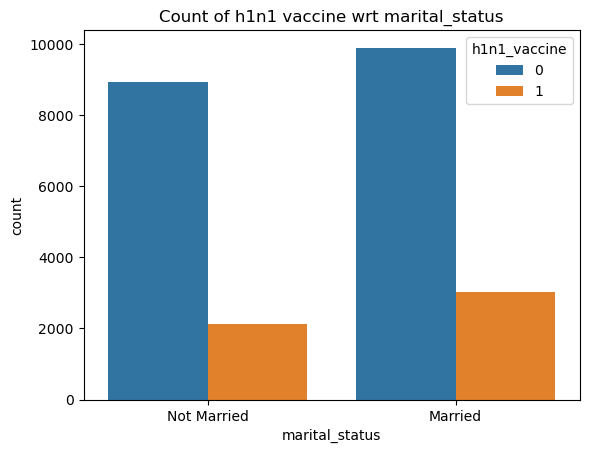

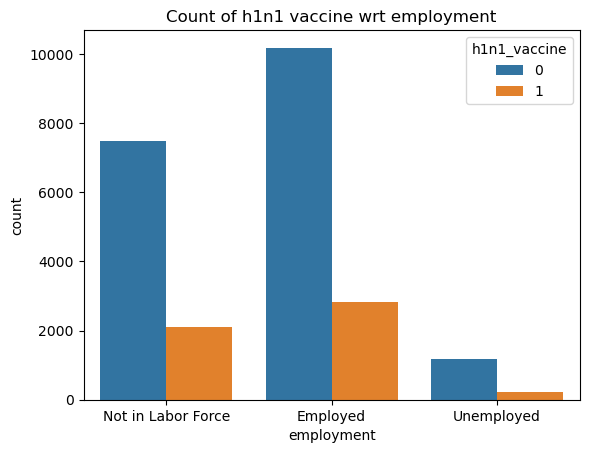

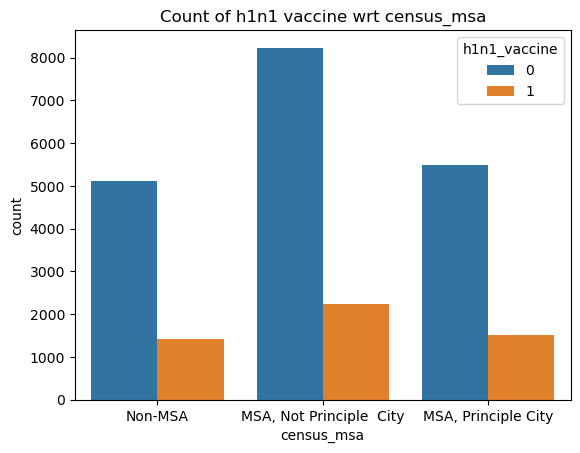

In [32]:
for i in cat_cols:
    sns.countplot(x=df[i], hue=df['h1n1_vaccine'])
    plt.title(f'Count of h1n1 vaccine wrt {i}')
    plt.show()

In [33]:
# inference: Features are not highly correlated.

In [34]:
corr = df.corr()
corr

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
h1n1_worry,1.000000,0.064810,0.084919,0.235038,0.160337,0.293169,0.259062,0.246251,0.246405,0.098392,...,0.033049,0.236419,0.377719,0.357982,0.234253,0.331733,0.221771,-0.019543,0.050070,0.123710
h1n1_awareness,0.064810,1.000000,-0.005323,0.080836,0.037060,0.088922,-0.042650,-0.065105,0.085552,-0.019695,...,0.171212,0.118168,0.079996,-0.020822,0.082096,0.078959,-0.061966,0.019812,0.053703,0.119059
antiviral_medication,0.084919,-0.005323,1.000000,0.047919,0.140597,0.059457,0.102051,0.122489,0.066050,0.010001,...,0.008428,0.029385,0.105564,0.079380,0.012904,0.082754,0.085508,0.042622,0.085837,0.040713
contact_avoidance,0.235038,0.080836,0.047919,1.000000,0.062124,0.332663,0.229318,0.222094,0.330271,0.038007,...,-0.000409,0.106170,0.121225,0.131740,0.113653,0.128421,0.083906,0.017011,0.043441,0.046212
bought_face_mask,0.160337,0.037060,0.140597,0.062124,1.000000,0.078607,0.176321,0.162608,0.104142,0.068214,...,0.070334,0.039275,0.131908,0.109009,0.039997,0.108955,0.091716,0.012911,0.003743,0.069432
wash_hands_frequently,0.293169,0.088922,0.059457,0.332663,0.078607,1.000000,0.193232,0.190300,0.362576,0.030719,...,0.053172,0.133045,0.170388,0.151903,0.137138,0.171759,0.088381,0.006759,0.044331,0.073464
avoid_large_gatherings,0.259062,-0.042650,0.102051,0.229318,0.176321,0.193232,1.000000,0.586323,0.253988,0.104971,...,-0.031051,0.054288,0.127561,0.190335,0.081358,0.133066,0.135500,-0.034186,-0.012666,0.017621
reduced_outside_home_cont,0.246251,-0.065105,0.122489,0.222094,0.162608,0.190300,0.586323,1.000000,0.265776,0.101847,...,-0.035941,0.050955,0.123524,0.177536,0.068733,0.117855,0.138828,-0.030451,-0.013777,0.018353
avoid_touch_face,0.246405,0.085552,0.066050,0.330271,0.104142,0.362576,0.253988,0.265776,1.000000,0.029819,...,0.068353,0.098704,0.148544,0.133350,0.102917,0.142970,0.091850,-0.003362,0.021196,0.070592
chronic_medic_condition,0.098392,-0.019695,0.010001,0.038007,0.068214,0.030719,0.104971,0.101847,0.029819,1.000000,...,-0.026042,0.042481,0.124582,0.087227,0.088338,0.165732,0.057214,-0.070430,-0.106355,0.099149


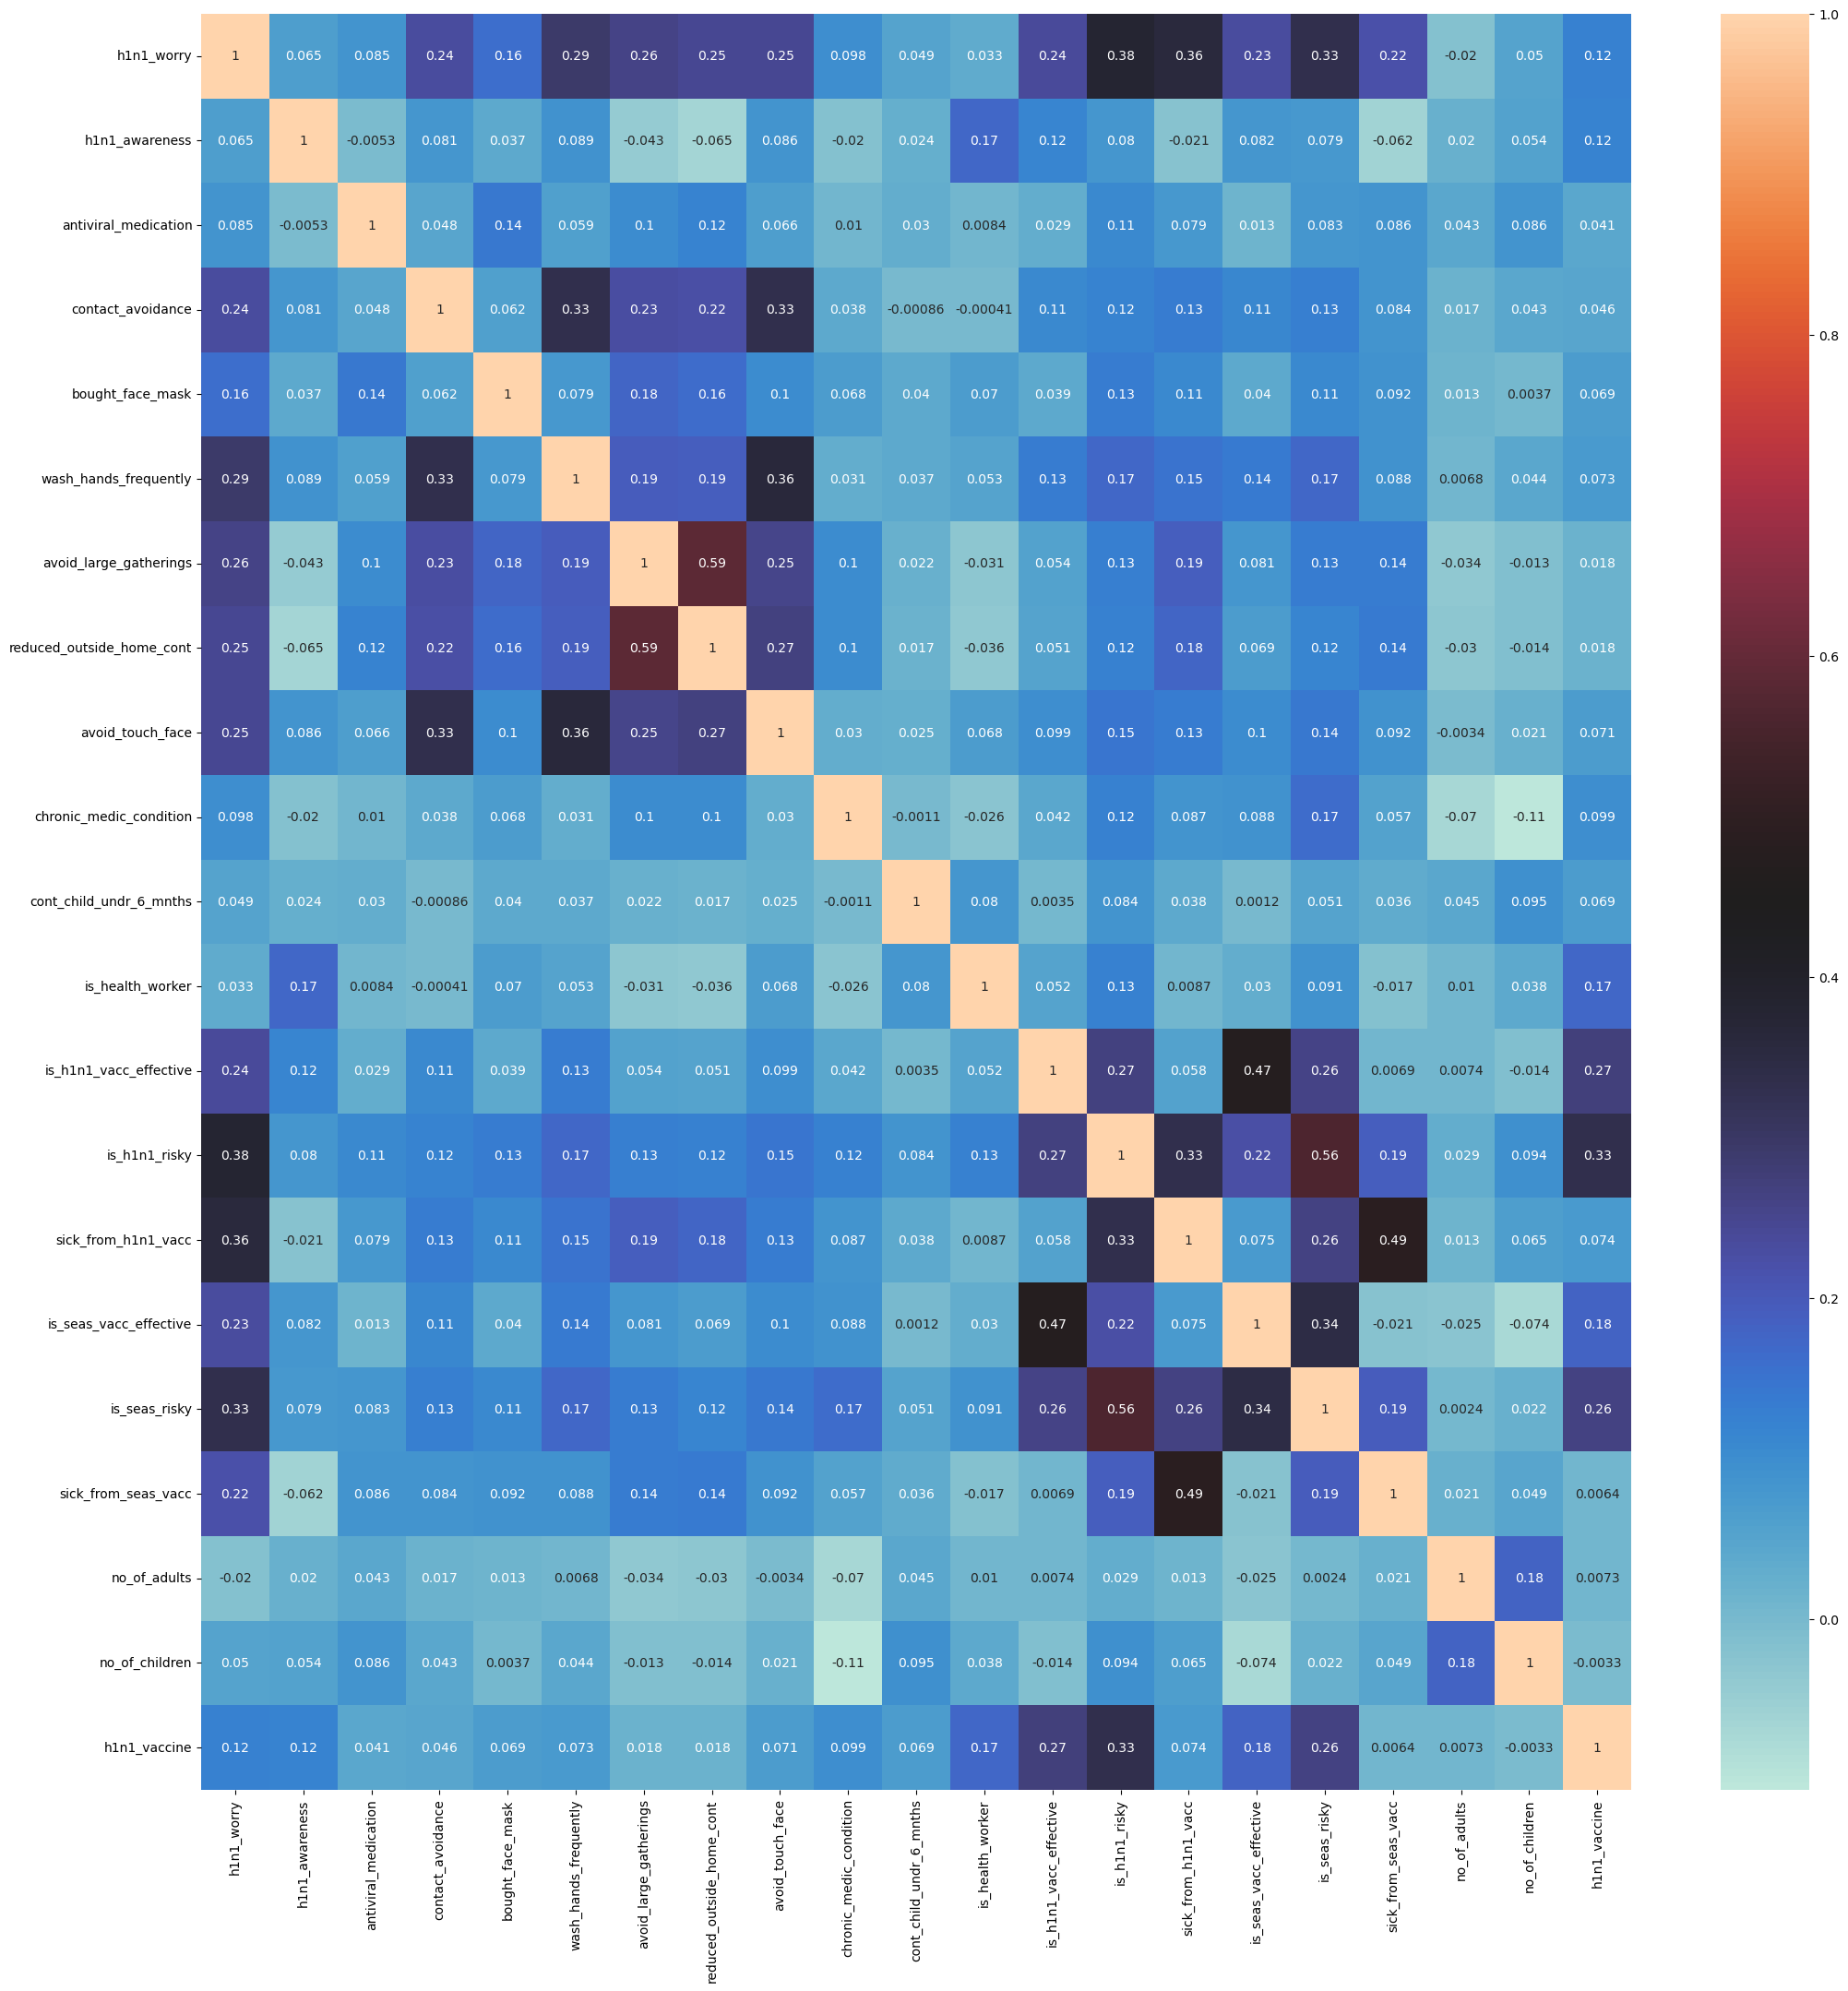

In [35]:
plt.figure(figsize = (25,25))
sns.heatmap(corr, annot = True, cmap='icefire')
plt.show()

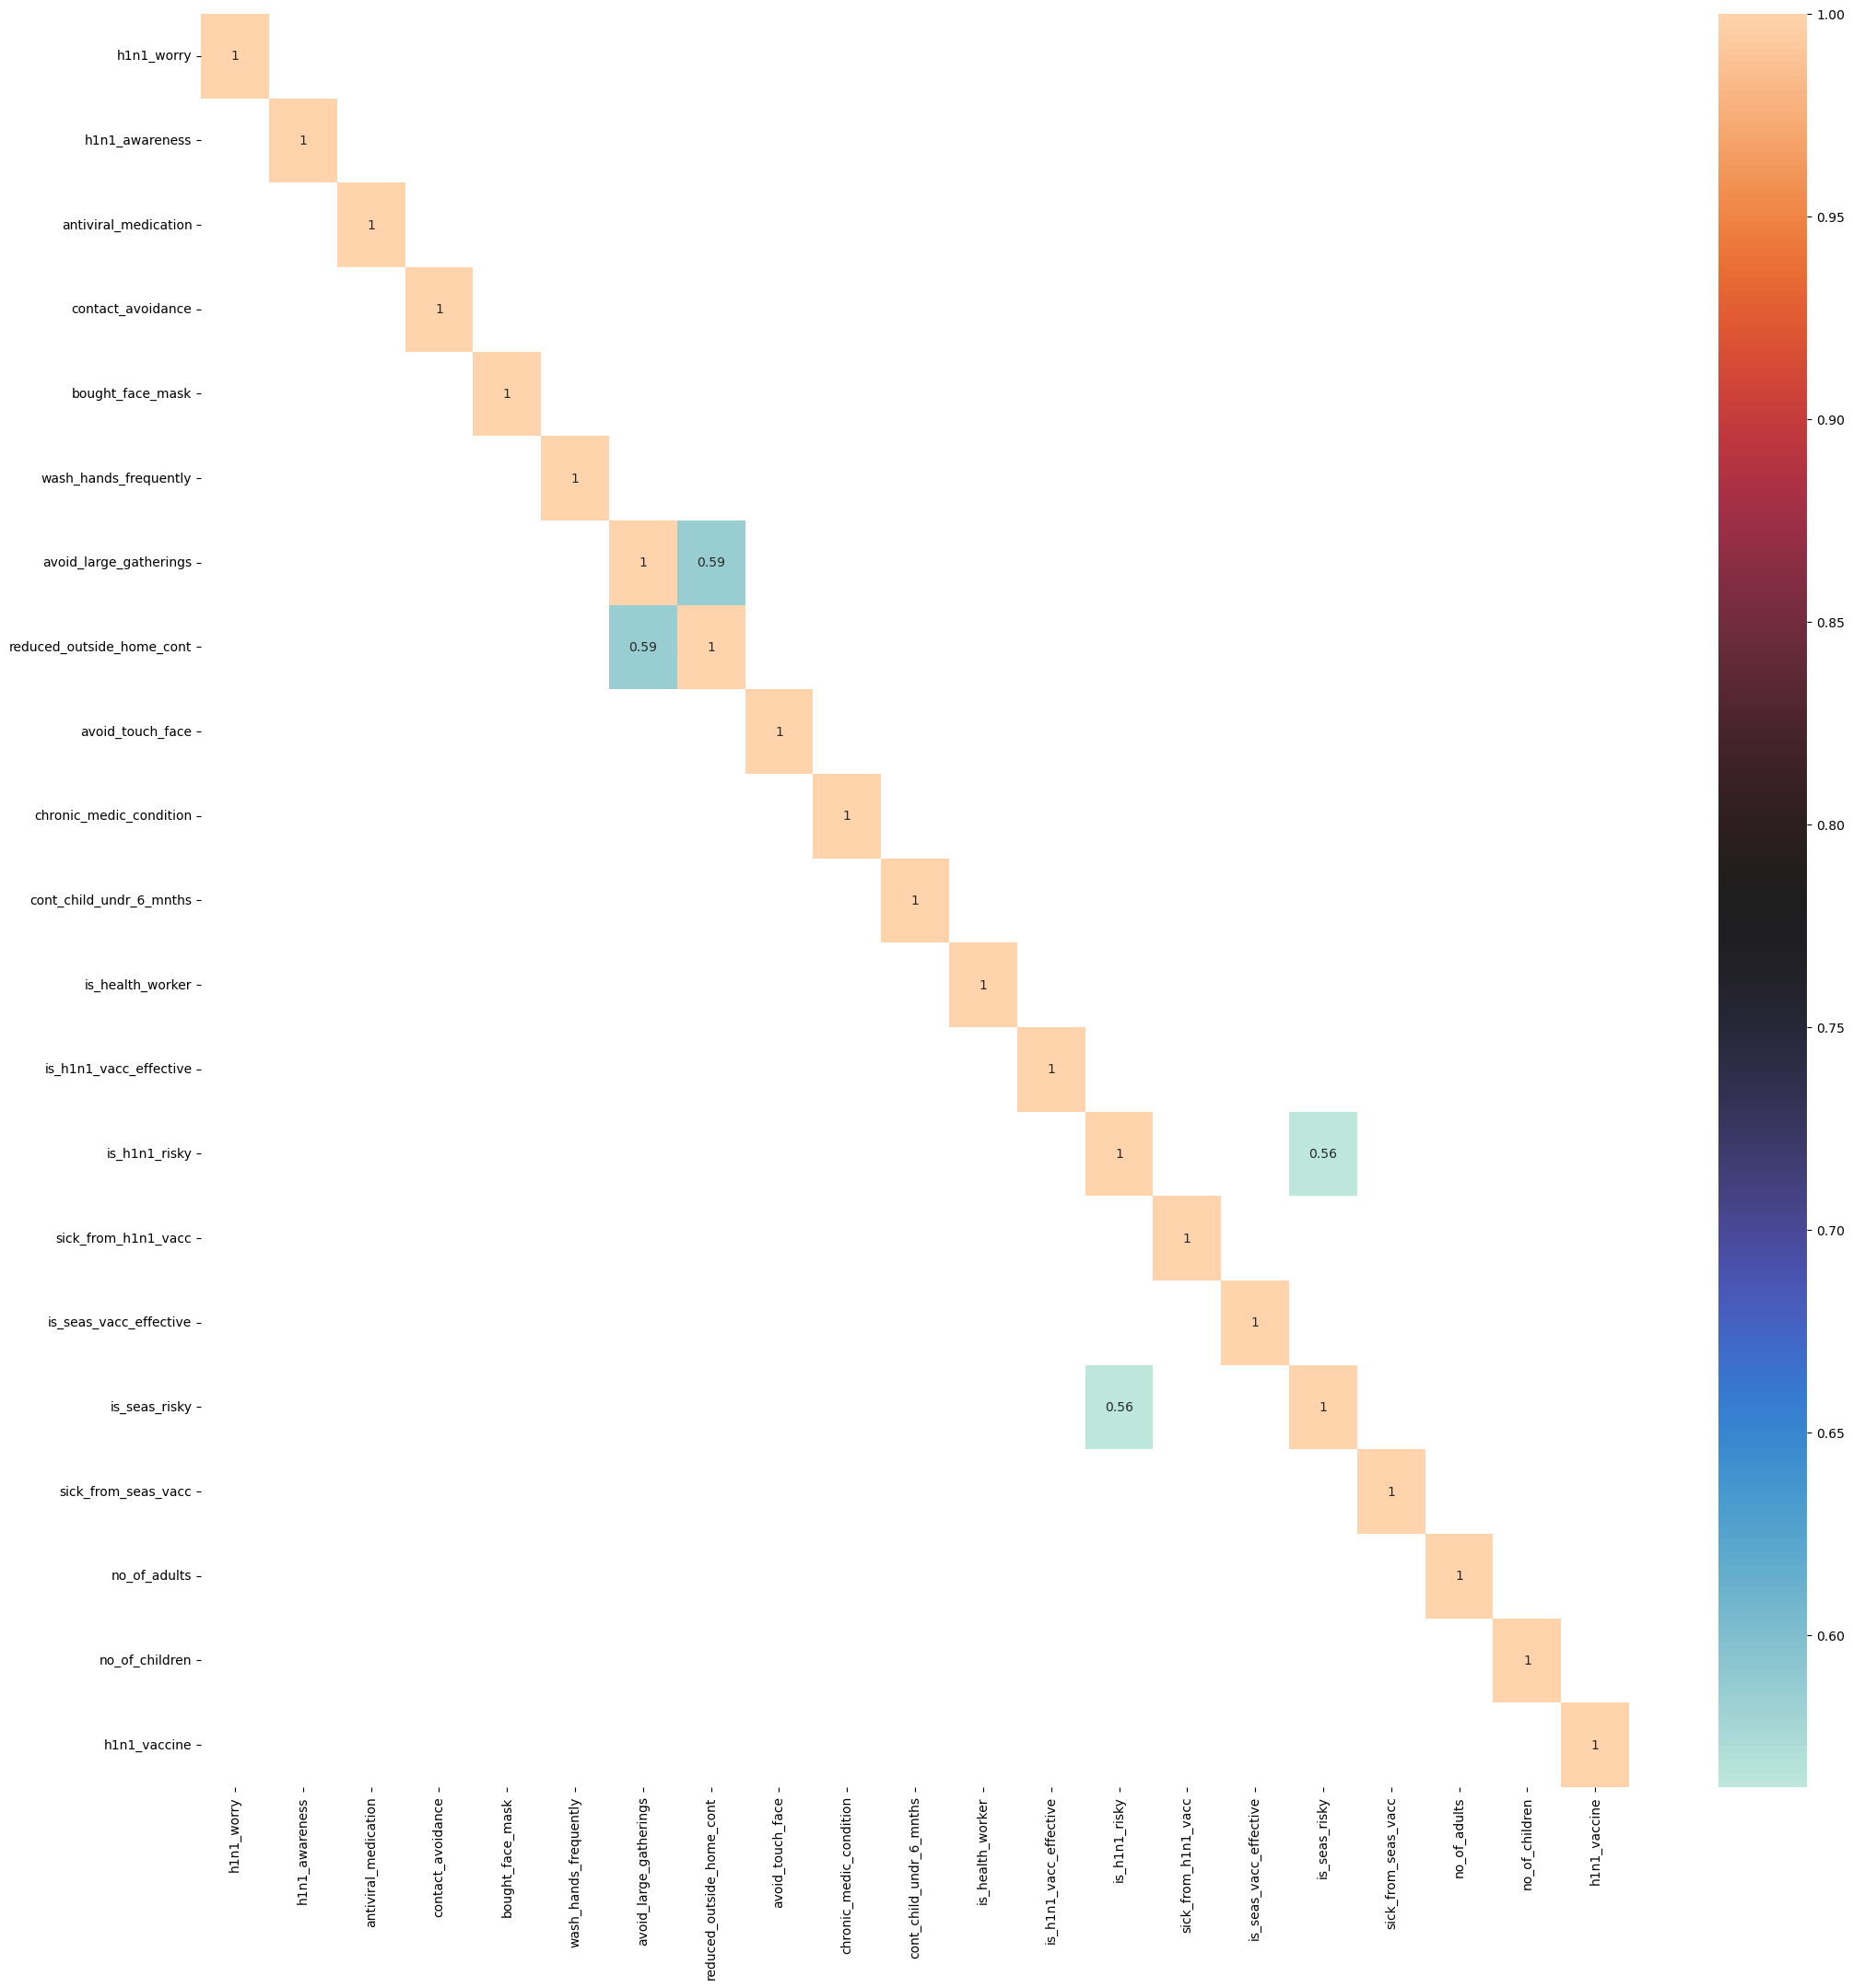

In [36]:
plt.figure(figsize = (25,25))
corr1 = corr[abs(corr)>0.5]
sns.heatmap(corr1, annot = True, cmap='icefire')
plt.show()

### Generate dummy variables

In [37]:
print(df.shape)

(23980, 28)


In [38]:
df_dummies = pd.get_dummies(df, drop_first=True)
print(df_dummies.shape)

(23980, 37)


In [39]:
df_dummies.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'race_Hispanic', 'race_Other or Multiple', 'race_White', 'sex_Male',
       'marital_status_Not Married', 'employment_Not in Labor Force',
       'employment_Unemployed', 'census_msa_MSA, Principle City',
       'census_msa_Non-MSA'],
      dtype='object')

### Select Dependent and Independent Features

In [40]:
x = df_dummies.drop('h1n1_vaccine',axis=1)
y = df_dummies['h1n1_vaccine']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(23980, 36)
(23980,)


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16786, 36)
(7194, 36)
(16786,)
(7194,)


### Creating function to generate confusion matrix, classification report

In [43]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [44]:
def eval_model(ytest, ypred):
    cm = confusion_matrix(ytest, ypred)
    print('Confusion Matrix\n:', cm)
    print('Accuracy Score:', accuracy_score(ytest, ypred))
    print('Classification Report:\n',classification_report(ytest, ypred))

### Model Building

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr1 = LogisticRegression(max_iter=10000)
lr1.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [47]:
print('Train Score:', lr1.score(x_train,y_train))
print('Test Score:', lr1.score(x_test,y_test))

Train Score: 0.8169903491004409
Test Score: 0.8087294968028913


In [48]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test, ypred_lr1)

Confusion Matrix
: [[5343  266]
 [1110  475]]
Accuracy Score: 0.8087294968028913
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      5609
           1       0.64      0.30      0.41      1585

    accuracy                           0.81      7194
   macro avg       0.73      0.63      0.65      7194
weighted avg       0.79      0.81      0.78      7194



In [50]:
print(x_test.shape)

(7194, 36)


In [51]:
ypred_lr1_proba = lr1.predict_proba(x_test)
print(len(ypred_lr1_proba))
print(ypred_lr1_proba[:10])

7194
[[0.76751171 0.23248829]
 [0.36903441 0.63096559]
 [0.8526275  0.1473725 ]
 [0.48175773 0.51824227]
 [0.88221897 0.11778103]
 [0.48597056 0.51402944]
 [0.8284431  0.1715569 ]
 [0.87588455 0.12411545]
 [0.86005548 0.13994452]
 [0.94216901 0.05783099]]


In [52]:
for i in ypred_lr1_proba[:5]:
    print(sum(i))

1.0
1.0
1.0
1.0
1.0


### ROC_AUC Curve

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
# roc_auc_score returns AUC

In [54]:
def plot_roc_auc(model,ytest,ypred_proba):
    fpr,tpr,thresh = roc_curve(ytest,ypred_proba[:,1])
    auc = roc_auc_score(ytest,ypred_proba[:,1])
    print('AUC',auc)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],label='TPR=FPR',color='red')
    plt.xlabel('FPR',fontsize=15)
    plt.ylabel('TPR',fontsize=15)
    plt.title('ROC Curve',fontsize=16)
    plt.legend()
    plt.show()
    return fpr,tpr,thresh

AUC 0.7885439860341621


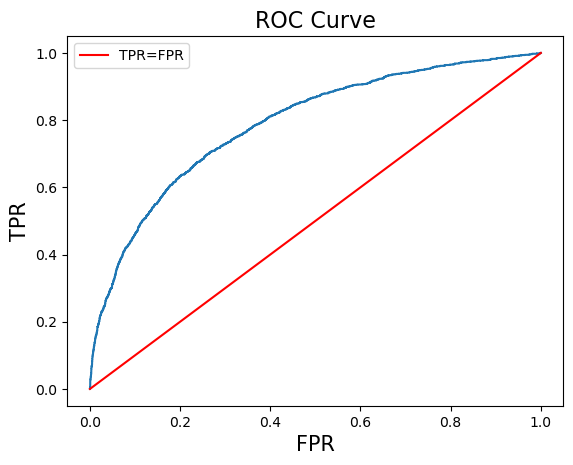

In [55]:
fpr_lr1,tpr_lr1,thresh_lr1 = plot_roc_auc(lr1,y_test,ypred_lr1_proba)

### Best Threshold

In [56]:
print(len(thresh_lr1))

1968


In [57]:
best_thresh_idx = np.argmax(tpr_lr1*(1-fpr_lr1))
print(thresh_lr1[best_thresh_idx])

0.2192838452053508


### Cross Validation

In [58]:
from sklearn.model_selection import cross_val_score,KFold

In [59]:
kf = KFold(n_splits=15)
lr2 = LogisticRegression(max_iter=10000)
cv_model = cross_val_score(lr2,x,y,cv=kf,scoring='accuracy')
print(cv_model)
print(cv_model.mean())

[0.8148843  0.80300188 0.82426517 0.79549719 0.82238899 0.8011257
 0.81676048 0.81175735 0.82301438 0.81738587 0.81038798 0.8310388
 0.82540676 0.79974969 0.81727159]
0.8142624079557442


#### Inference:
1) CV Avg Score suggests that the model is robust across different splits

### SGDClassifier

In [61]:
from sklearn.linear_model import SGDClassifier

In [62]:
sgd1 = SGDClassifier(max_iter=1000,eta0=0.001,loss='log')
sgd1.fit(x_train,y_train)

SGDClassifier(eta0=0.001, loss='log')

In [63]:
print('Training score',sgd1.score(x_train,y_train))
print('Testing score',sgd1.score(x_test,y_test))

Training score 0.8114500178720362
Testing score 0.8045593550180706


In [64]:
ypred_sgd1 = sgd1.predict(x_test)
eval_model(y_test,ypred_sgd1)

Confusion Matrix
: [[5447  162]
 [1244  341]]
Accuracy Score: 0.8045593550180706
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.89      5609
           1       0.68      0.22      0.33      1585

    accuracy                           0.80      7194
   macro avg       0.75      0.59      0.61      7194
weighted avg       0.78      0.80      0.76      7194

